<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST2312/blob/main/CST2312_WK16CL26_Datetime_06Dec2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Datetime and NYC OpenData Film Permits**
*as of: 06-Dec-2021*



Attach Google Drive MyDocuments/data to /gdrive in Contents of Colab

The following files will be accessed using Google Drive from this notebook: 

*   avocado.csv
*   family.csv
*   Film_Permits_RuhRoh_03DEC2021.csv
*   Film_Permits_03DEC2021.csv

In addition, the following file will be accessed using an internet URL in this notebook: 

*   http://bit.ly/uforeports


In [38]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Import Pandas and Numpy libraries

In [39]:
import pandas as pd
import numpy as np

## **Working with Dates and Times**
*using avocado.csv of price data as an example*

One challenge in acquiring, scrubbing, and ETL (extract, translate, and load) of source date is the formatting of dates and times.

This section references examples from: 
1.   "DateTime in Pandas read_csv()" by Paritosh Sharma Ghimire on medium.com -- https://bit.ly/333qcnF
2.   Version 1 of "Avocado Prices: Historical data on avocado prices and sales volume in multiple US markets" by Justin Kiggins on Kaggle -- https://www.kaggle.com/neuromusic/avocado-prices

To begin, the file **avocados.csv** is uploaded and available in Google Drive at **content/gdrive/MyDrive/data/avocados.csv**

The small file **family.csv** is also uploaded and available in Google Drive in the same folder.  This file is used later in this notebook.

*See the google.colab import of drive() and the MyDrive mount to gdrive earlier*

We should also import the Python datetime libary.

To save typing, you could 

```
import datetime as dt
```

***For demonstration puroses in this notebook the datetime library is imported with its full name*** 

In [ ]:
import datetime

As strings are represented as string objects, integers as Integer objects, floats as floating point objects in python, dates should be of type Datetime.

In [ ]:
print("The type of 5 is: ", type(5))
# <class 'int'>

print("The type of 'Nepal' is: ", type('Nepal'))
# <class 'str'>

print("The type of datetime.date(2051,7,14) is: ", type(datetime.date(2051,7,14)))
# <class 'datetime.date'>

The type of 5 is:  <class 'int'>
The type of 'Nepal' is:  <class 'str'>
The type of datetime.date(2051,7,14) is:  <class 'datetime.date'>


Reminder: the following libraries should be imported by now - 
*   pandas as pd
*   numpy as np
*   datetime

Datetime objects are unique. For python to recognize an object as string, the value must be inside single/double quotes. For python to recognize Datetime objects, they must be created using **datetime.datetime() method**. 

Here is the link to the python documentation on datetime and basic date and time types:

https://docs.python.org/3/library/datetime.html

Datetime variables in Python cane be **aware** or **naive**.  The distinction is that **aware** datetime information is defined to include its relative time zone and can be used in conjunction with other **aware** datetime values whereas **naive** datetime information does not have its time zone defined and cannot be comingled with other datetime information from other time zones.

The specific class of variable is supplied by the datetime module. This class can represent simple timezones (aware) or not (naive) and includes the following: 

*   **class datetime.date** - An idealized naive date, assuming the current Gregorian calendar always was, and always will be, in effect. Attributes: year, month, and day.

*   **class datetime.time** - An idealized time, independent of any particular day, assuming that every day has exactly 24*60*60 seconds. (There is no notion of “leap seconds” here.) Attributes: hour, minute, second, microsecond, and tzinfo.

*   **class datetime.datetime** - A combination of a date and a time. Attributes: year, month, day, hour, minute, second, microsecond, and tzinfo.

*   **class datetime.timedelta** - A duration expressing the difference between two date, time, or datetime instances to microsecond resolution.

*   **class datetime.tzinfo** - An abstract base class for time zone information objects. These are used by the datetime and time classes to provide a customizable notion of time adjustment (for example, to account for time zone and/or daylight saving time).

*   **class datetime.timezone** - A class that implements the tzinfo abstract base class as a fixed offset from the UTC.


Use the **.tzinfo** attribute of a datetime object to determine whether that object is **aware** or **naive**.

1.   A datetime object **d** is **aware** if both of the following hold:
```
d.tzinfo is not None
d.tzinfo.utcoffset(d) does not return None
```
Otherwise, **d** is **naive**.


2.   A time object **t** is aware if both of the following hold:
```
t.tzinfo is not None
t.tzinfo.utcoffset(None) does not return None.
```
Otherwise, **t** is **naive**.


The distinction between **aware** and **naive** doesn’t apply to **timedelta** objects.


Working with dates and parsing them is one of the biggest challenges for programmers.

Let's use an example to illustrate the point. We will be using the Avocado Prices dataset in a CSV file. You can download the data from the link presented earlier.

Let's read the avocado.csv file to df_av with pd.read_csv()

In [ ]:
df_av = pd.read_csv('/content/gdrive/MyDrive/data/avocado.csv')

Let's use head() to look at some of the file's contents

In [ ]:
df_av.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


... and have a look at the data type for each Variable (column) in the df_av DataFrame

In [ ]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


### **Parsing dates as datetime during read_csv()**

We see the data type of the ‘Date’ column is not ‘DateTime’, but 'Object' which is the pandas equivalent of python’s String and is interchangeable with it in most cases.

For python to treat an object as datetime object instead of str,int, float; the object should be created or parsed using **datetime.datetime()** or a **datetime parser**.

By default, the date columns have been read as strings(objects) by the pandas **read_csv()** method and not as datetime objects.  We want pandas to read columns with dates not as strings(objects) but as datetime objects.

We can achive this by parsing the dates as datetime at the time of reading the data.

Set **parse_dateparameter** of **read_csv()** to the label/index of the column you want to parse(convert string date into datetime object).

Only booleans, lists, and dictionaries are accepted for the 'parse_dates' parameter.


```
parse_date = ['Date'] or parse_date = [1]
```


In [ ]:
df_av_parsed = pd.read_csv('/content/gdrive/MyDrive/data/avocado.csv', parse_dates=['Date'])

Let's have a looked at our new DataFrame **df_av_parsed** with parsed '**Date**' variable (column)

In [ ]:
df_av_parsed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


We can check the type of an element in the new DataFrame **df_av_parsed** for the variable '**Date**'

In [ ]:
type(df_av_parsed['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp


**Timestamp** is the Pandas equivalent of python’s **Datetime** and is interchangeable with it in most cases.

The benefits of using a datetime object instead of String objects include:

*   chronological ordering of dates/times
*   calculating differential time
*   dealing with time zones
*   daylight saving time
*   accomodating different written date formats
*   other date-specific logic



### **Converting String Dates to Datetime Objects in a Pandas DataFrame**

Pandas has a built-in function called **to_datetime(**) that can be used to convert strings to datetime object.

```
df['Date] = pd.to_datetime(df['Date'])
```


In [ ]:
df_av.info()

In [ ]:
df_av['Date'] = pd.to_datetime(df_av['Date'])

Let's look at our original DataFrame df_av which had read in the 'Date' column as a String(Object).

In [ ]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


We can look at some of the values...

In [ ]:
selection = df_av.iloc[:10,1]
print("The first ten rows of the parsed Date value: \n",selection)

The first ten rows of the parsed Date value: 
 0   2015-12-27
1   2015-12-20
2   2015-12-13
3   2015-12-06
4   2015-11-29
5   2015-11-22
6   2015-11-15
7   2015-11-08
8   2015-11-01
9   2015-10-25
Name: Date, dtype: datetime64[ns]


... or ...

In [ ]:
selection = df_av['Date']
print(selection[:10])

0   2015-12-27
1   2015-12-20
2   2015-12-13
3   2015-12-06
4   2015-11-29
5   2015-11-22
6   2015-11-15
7   2015-11-08
8   2015-11-01
9   2015-10-25
Name: Date, dtype: datetime64[ns]


### **Custom Date Formats**

Sometimes, dates might be in a custom format, for example, YYYY-DD-MM HH:MM:SS. 


In [ ]:
df_x = pd.DataFrame({'Date':['1994-10-31 12:30:00', '1995-11-23 15:30:00', '2004-1-1 00:30:00'], 'name':['psg','aw','prw']})
df_x

,Date,name
0,1994-10-31 12:30:00,psg
1,1995-11-23 15:30:00,aw
2,2004-1-1 00:30:00,prw


In [ ]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3 non-null      object
 1   name    3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes



Pandas **to_datetime()** has a parameter called **format** that allows you to pass a custom format as the argument:

In [ ]:
df_x['Date'] = pd.to_datetime(df_x['Date'], format='%Y-%m-%d  %H:%M:%S')

In [ ]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3 non-null      datetime64[ns]
 1   name    3 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 176.0+ bytes


In [ ]:
df_x.head()

,Date,name
0,1994-10-31 12:30:00,psg
1,1995-11-23 15:30:00,aw
2,2004-01-01 00:30:00,prw


### **Sourcing Date Components from Separate Variables**


What if year, month and day are in separate columns? Can we assemble them into a single column as datetime objects?


Set the **parameterparse_date** to a dictionary in the **read_csv()** method.

The **key** in the dictionay should be the name of the column and the **value** should be a list with the index of the columns you want to combine.

This will collapse the existing columns into the newly defined timedate object.  That means there will not be columns in the resultant DataFrame for the variables which were included as part of the value in the dictionary used to creat the parsed datetime variable. 


In [ ]:
df_fam = pd.read_csv('/content/gdrive/MyDrive/data/family.csv', parse_dates={'date_of_birth':[0,1,2]},)

In [ ]:
df_fam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_of_birth  3 non-null      datetime64[ns]
 1   name           3 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 176.0+ bytes


In [ ]:
df_fam

,date_of_birth,name
0,1994-02-19,psg
1,1995-10-15,aw
2,1996-12-16,prw


As mentioned above, the syntax used did not create columns in the resultant DataFrame for the variables which were included as part of the value in the dictionary used to creat the parsed datetime variable. 
 If you want to keep the existing columns then set:

`keep_date_col = True`

In [ ]:
df_fam = pd.read_csv('/content/gdrive/MyDrive/data/family.csv', parse_dates={'date_of_birth':[0,1,2]}, keep_date_col=True)

In [ ]:
df_fam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_of_birth  3 non-null      datetime64[ns]
 1   year           3 non-null      object        
 2   month          3 non-null      object        
 3   day            3 non-null      object        
 4   name           3 non-null      object        
dtypes: datetime64[ns](1), object(4)
memory usage: 248.0+ bytes


In [ ]:
df_fam

,date_of_birth,year,month,day,name
0,1994-02-19,1994,2,19,psg
1,1995-10-15,1995,10,15,aw
2,1996-12-16,1996,12,16,prw


**parse_dates** accepts the following types of arguments: bool or list of int or names or list of lists or dict.  The default argument is the Boolean False.

The behavior of **parse_dates** arguments: 

*   boolean. If True -> try parsing the index.
*   list of int or names. e.g. If [1, 2, 3] -> try parsing columns 1, 2, 3 each as a separate date column.
*   list of lists. e.g. If [[1, 3]] -> combine columns 1 and 3 and parse as a single date column.
*   dict, e.g. {‘foo’ : [1, 3]} -> parse columns 1, 3 as date and call result ‘foo’


### **Assembling a Datetime from Columns Already in a DataFrame**


We can use the pd.to_datetime() method to assemble a datetime in a single column (varible)  and convert them to datetime object.  By default, the existing columns will not be collapsed and will remain there.


In [ ]:
df_fam2 = pd.read_csv('/content/gdrive/MyDrive/data/family.csv')

In [ ]:
df_fam2

,year,month,day,name
0,1994,2,19,psg
1,1995,10,15,aw
2,1996,12,16,prw


In [ ]:
df_fam2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    3 non-null      int64 
 1   month   3 non-null      int64 
 2   day     3 non-null      int64 
 3   name    3 non-null      object
dtypes: int64(3), object(1)
memory usage: 224.0+ bytes


Let's create a new datetime variable called 'Date'

In [ ]:
df_fam2['Date'] = pd.to_datetime(df_fam2[['year','month','day']])

In [ ]:
df_fam2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    3 non-null      int64         
 1   month   3 non-null      int64         
 2   day     3 non-null      int64         
 3   name    3 non-null      object        
 4   Date    3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 248.0+ bytes


In [ ]:
df_fam2

,year,month,day,name,Date
0,1994,2,19,psg,1994-02-19
1,1995,10,15,aw,1995-10-15
2,1996,12,16,prw,1996-12-16




---




## **The Concept of Time Zones in Python**

A time zone represents the standardized time depending on which part of the world is being considered.


In simple terms, timezone refers to the local time of a region. UTC (Coordinated Universal Time) is the astronomical time based on earth’s rotation, is the standard against which the world’s region-based time is coordinated.

*Note: UTC – Coordinated Universal Time is the common time standard across the world. So, in Python, to work with the timezone without any issues, it is recommended to use the UTC as your base timezone*

For example, CT(Central Time) in North and South America is either 5 or 6 hours behind and represented as UTC-5 or UTC-6 based on the Day Light Saving. 

The following illustration shows a few examples.


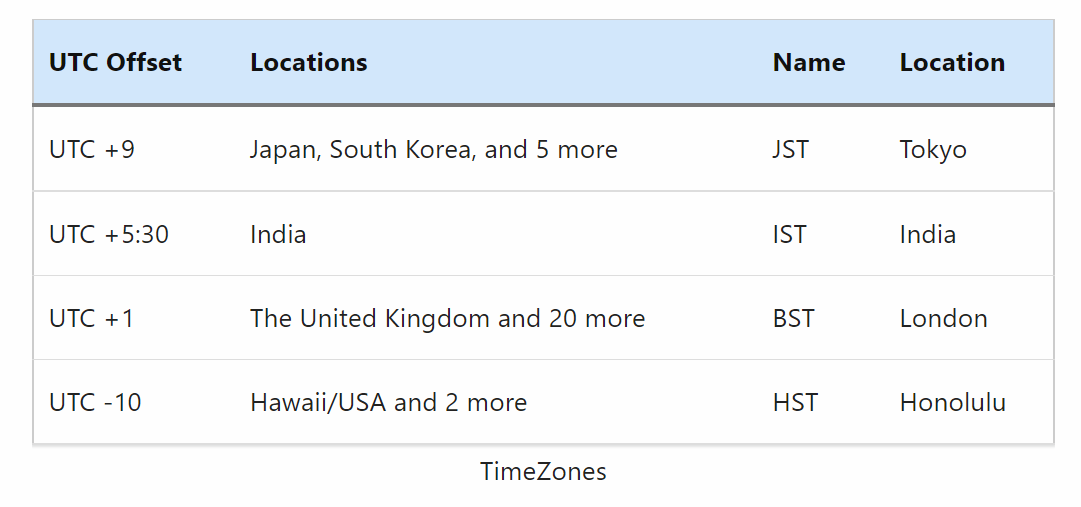


Python provides the **datetime.tzinfo** abstract base class which provides methods to handle timezone. But this class is an abstract base class and should not be instantiated directly. We need to define a subclass of tzinfo to capture information about a particular time zone.

The **pytz** library has implemented a timezone class for handling arbitrary fixed offsets from UTC and timezones. This library allows accurate and cross-platform timezone calculations and also solves the issue of ambiguous times at the end of daylight saving time.

**pytz** is a concrete implementation of the abstract base class **tzinfo** and is used to create timezone-aware datetime objects.

For example, The **datetime.now()** function returns the current local date-time without any timezone information. Using the **pytz** library, we can pass the timezone name to this function to get the current datetime in the given timezone.

We can use the following attributes and methods of the pytz module to work with timezone in Python.

*   **pytz.utc** - Get the standard UTC timezone
*   **pytz.timezone('region')** - Create the timezone object of a particular region
*   **pytz.astimezone()** - Convert the time of a particular time zone into another time zone



**Create Timezone Aware Datetime Object**


In Python, a date object can be mentioned with (aware) or without (naive) timezones. Based on that, an object is known as Naive or Aware. A date object, by default, is naive. A datetime or time object is aware if it holds the timezone(tz) value.

Follow the below steps to create a timezone aware Datetime Object in Python: –

1.   Install **pytz** module if not installed using the pip install pytz command.


```pip install pytz``` 

```import pytz```

2.   Use the **pytz.timezone('region_name')** function to create the timezone object

3.   Use the **datetime.now(timezone_obj)** or **datetime.datetime('timezone')** function to create the timezone aware current datetime.


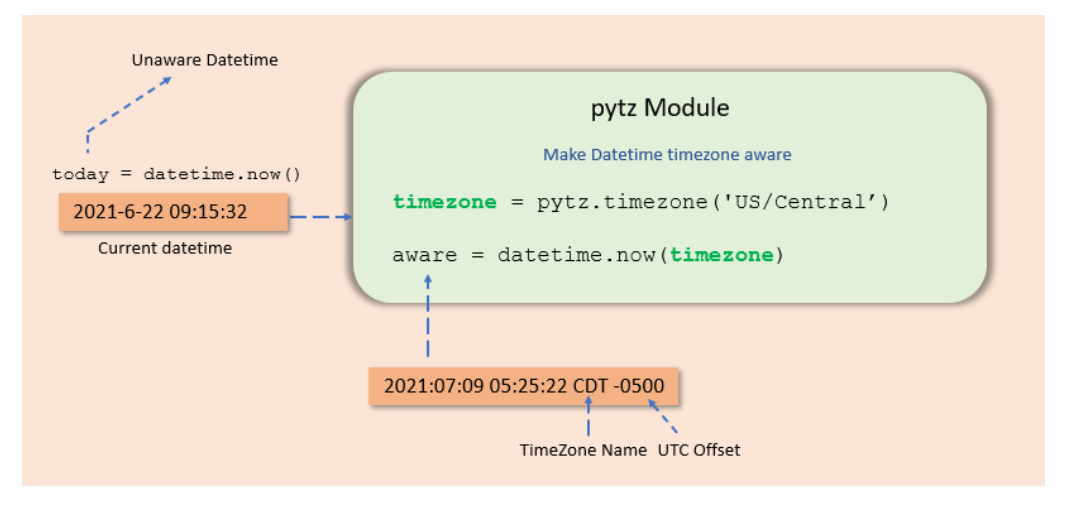

In [ ]:

# from datetime import datetime - if you want to save typing
# import datetime as dt - another way to save typing
import datetime
import pytz

# current local Datetime unaware
unaware = datetime.datetime.now()
print('Local - Timezone naive:\t', unaware)

# Standard UTC timezone aware Datetime
aware = datetime.datetime.now(pytz.utc)
print('UTC - Timezone aware:\t', aware)

# US/Central timezone datetime
aware_us_central = datetime.datetime.now(pytz.timezone('US/Central'))
print('US Central - Timezone DateTime\t', aware_us_central)

# US/Eastern timezone datetime
aware_us_eastern = datetime.datetime.now(pytz.timezone('US/Eastern'))
print('US Eastern - Timezone DateTime\t', aware_us_eastern)

Local - Timezone naive:	 2021-12-06 18:09:01.617220
UTC - Timezone aware:	 2021-12-06 18:09:01.619198+00:00
US Central - Timezone DateTime	 2021-12-06 12:09:01.649253-06:00
US Eastern - Timezone DateTime	 2021-12-06 13:09:01.651660-05:00


Let's use the **dir()** function to look at each variable...

In [ ]:
# Current local unaware Datetime tzinfo
print('\nLocal - Timezone Naive unaware.tzinfo:\n', unaware.tzinfo)

# Standard UTC aware Datetime tzinfo
print('\n\nUTC - Timezone Aware aware.tzinfo:\n', aware.tzinfo)

# US/Central timezone aware datetime tzinfo
print('\n\nUS Central DateTime Aware aware_us_central.tzinfo:\n', aware_us_central.tzinfo)

# US/Eastern timezone aware datetime tzinfo
print('\n\nUS Eastern DateTime Aware aware_us_eastern.tzinfo:\n', aware_us_eastern.tzinfo)

# Rules for aware datetime:
# d.tzinfo is not None
# d.tzinfo.utcoffset(d) does not return None


Local - Timezone Naive unaware.tzinfo:
 None


UTC - Timezone Aware aware.tzinfo:
 UTC


US Central DateTime Aware aware_us_central.tzinfo:
 US/Central


US Eastern DateTime Aware aware_us_eastern.tzinfo:
 US/Eastern


Refer to [list all time zones in Python](https://pynative.com/list-all-timezones-in-python/) if you do not know the exact name of the timezone you would like to reference. 

To make an old/existing datetime timezone aware, use the **timezone.replace()** method.

In [ ]:
unaware = datetime.datetime(2021, 12, 6, 12, 45, 17, 5)
print('Timezone naive:', unaware, "\t\t unaware.tzinfo: ", unaware.tzinfo)

# Convert unaware Datetime to UTC timezone aware Datetime
aware = unaware.replace(tzinfo=pytz.UTC)
print('Timezone aware:', aware, "\t aware.tzinfo:\t ", aware.tzinfo)


Timezone naive: 2021-12-06 12:45:17.000005 		 unaware.tzinfo:  None
Timezone aware: 2021-12-06 12:45:17.000005+00:00 	 aware.tzinfo:	  UTC




**Get Current Time in Different Timezone**

Using the **pytz** module we can get the current date and time of any timezone by passsing the timezone **region_name** as an argument to the **timezone()** method.


Steps:

1.   Use the **pytz.timezone('region_name')** function to create the timezone object(timezone_obj).

2.   Use **datetime.now(timezone_obj)** function to get the current datetime of the given timezone.

*Note: UTC – Coordinated Universal Time is the common time standard across the world. To avoid confusion , it is recommended to use the UTC as the base timezone for analysis then translate to the desired timezone for any reporting or other uses.*


In the next example, we get the current datetime (date and time) in the following TimeZones of United States.

In [ ]:
dt_us_eastern = datetime.datetime.now(pytz.timezone('America/New_York'))
print("US Eastern timezone DateTime:\t", dt_us_eastern.strftime("%Y:%m:%d %H:%M:%S %Z %z"))

dt_us_central = datetime.datetime.now(pytz.timezone('America/Mexico_City'))
print("US Central timezone DateTime:\t", dt_us_central.strftime("%Y:%m:%d %H:%M:%S %Z %z"))

dt_us_mountain = datetime.datetime.now(pytz.timezone('America/Chihuahua'))
print("US Mountain timezone DateTime:\t", dt_us_mountain.strftime("%Y:%m:%d %H:%M:%S %Z %z"))

dt_us_pacific = datetime.datetime.now(pytz.timezone('America/Tijuana'))
print("US Pacific timezone DateTime:\t", dt_us_pacific.strftime("%Y:%m:%d %H:%M:%S %Z %z"))


Let's try some international time zone regions...


In [ ]:
dt_japan = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))
print("Japan DateTime:\t\t\t", dt_japan.strftime("%Y:%m:%d %H:%M:%S %Z %z"))

dt_brazil = datetime.datetime.now(pytz.timezone('America/Sao_Paulo'))
print("Brazil DateTime:\t\t", dt_brazil.strftime("%Y:%m:%d %H:%M:%S %Z %z"))

dt_uk = datetime.datetime.now(pytz.timezone('Europe/London'))
print("Uk DateTime:\t\t\t", dt_uk.strftime("%Y:%m:%d %H:%M:%S %Z %z"))

dt_germany = datetime.datetime.now(pytz.timezone('Europe/Berlin'))
print("Germany DateTime:\t\t", dt_germany.strftime("%Y:%m:%d %H:%M:%S %Z %z"))

dt_aus = datetime.datetime.now(pytz.timezone('Australia/Canberra'))
print("Australia Oceanic DateTime:\t", dt_aus.strftime("%Y:%m:%d %H:%M:%S %Z %z"))

dt_africa = datetime.datetime.now(pytz.timezone('Africa/Maputo'))
print("Central Africa DateTime:\t", dt_africa.strftime("%Y:%m:%d %H:%M:%S %Z %z"))



**Get TimeZone Information Using tzinfo**


The **datetime.tzinfo** is an abstract base class containing information about the date or time object passed to them.

The tzinfo generally contains the following information: –

*   The time zone name (region_name) of a Datetime
*   Offset from the UTC (Coordinated Universal Time)
*   The DST(Daylight Saving Time) status


The **tzinfo** class provides the following method to get the timezone information: –

*   **tzinfo.tzname(dt)** - Returns the time zone name corresponding to the datetime object dt. This method returns the name that is used while creating the timezone object

*   **tzinfo.utcoffset(dt)** - This method returns the total offset from the UTC which should be a timedelta object. The values of the timedelta is positive if it is east of UTC and negative for the west of UTC. The total offset includes both timezone and the DST(Day light savings) values. The range of the timedelta is therfore between -timedelta(hours=24) to timedelta(hours=24)

*   **tzinfo.dst(dt)** - This method returns dst offset in the zones where dst is in effect. In other cases it will return only timedelta(0). The dst information is already part of the the utcoffset therefore the **tz.utcoffset(dt)** - **tz.dst(dt)** should return the standard offset of the timezone irrespective of the date and time but only on the geographic location.



In [ ]:
# example using US Eastern time

# timezone: US Eastern Time
dt_us_eastern = datetime.datetime.now(pytz.timezone('America/New_York'))
print("US Eastern DateTime:", dt_us_eastern.strftime("%Y:%m:%d %H:%M:%S %Z %z"))

# Get current TimeZone name
print("Current time zone (region_name) name: ", dt_us_eastern.tzname())

# Get UTC Offset
print("Current time zone offset from UTC: ", dt_us_eastern.utcoffset())

# Get the daylight saving time (DST offset) adjustment
print("Current time zone DST adjustment: ", dt_us_eastern.dst())

The datetime modules have the **timezone** class, which in turn is the subclass of the abstract base class **tzinfo**

**Converting Between Timezones**

Use the **datetime.astimezone()** method to convert the datetime from one timezone to another. 

This method uses an instance of the datetime object and returns a new datetime of a given timezone.

In [ ]:
# UTC timezone Datetime
dt_local = datetime.datetime.now(pytz.utc)
print("UTC DateTime:\t\t", dt_local.strftime("%Y:%m:%d %H:%M:%S %Z %z"))

# convert UTC timezone to 'US/Central'
dt_us_central = dt_local.astimezone(pytz.timezone('US/Central'))
print("US Central DateTime:\t", dt_us_central.strftime("%Y:%m:%d %H:%M:%S %Z %z"))

# Convert 'US/Central' timezone to US/Eastern
dt_us_eastern = dt_us_central.astimezone(pytz.timezone('America/New_York'))
print("US Eastern DateTime:\t", dt_us_eastern.strftime("%Y:%m:%d %H:%M:%S %Z %z"))

# Convert US/Eastern timezone to IST (India) timezone
dt_ind = dt_us_eastern.astimezone(pytz.timezone('Asia/Kolkata'))
print("India DateTime:\t\t", dt_ind.strftime("%Y:%m:%d %H:%M:%S %Z %z"))

UTC DateTime:		 2021:12:06 18:21:32 UTC +0000
US Central DateTime:	 2021:12:06 12:21:32 CST -0600
US Eastern DateTime:	 2021:12:06 13:21:32 EST -0500
India DateTime:		 2021:12:06 23:51:32 IST +0530




---



**Reference:  Timezones in Python**

*Finding a time zone:*

Also, see [Working with Time Zones in Python](https://pynative.com/python-timezone/) by PyNative.

**pytz** is based on the Olson time zone database. 

Some of the following examples are sourced from [pvlib python](https://pvlib-python.readthedocs.io/en/stable/timetimezones.html)

We can obtain a list of all valid time zone strings with pytz.all_timezones. 

The Olson time zone list is long, so we only print every 20th time zone in the following example.


In [ ]:
import pytz

print(len(pytz.all_timezones))

print(pytz.all_timezones[::20])


592
['Africa/Abidjan', 'Africa/Douala', 'Africa/Mbabane', 'America/Argentina/Catamarca', 'America/Belize', 'America/Curacao', 'America/Guatemala', 'America/Kentucky/Louisville', 'America/Mexico_City', 'America/Port-au-Prince', 'America/Sitka', 'Antarctica/Casey', 'Asia/Ashkhabad', 'Asia/Dubai', 'Asia/Khandyga', 'Asia/Qatar', 'Asia/Tomsk', 'Atlantic/Reykjavik', 'Australia/Queensland', 'Canada/Yukon', 'Etc/GMT+7', 'Etc/UCT', 'Europe/Guernsey', 'Europe/Paris', 'Europe/Vienna', 'Indian/Cocos', 'NZ', 'Pacific/Honolulu', 'Pacific/Samoa', 'US/Eastern']


Let's use **pytz** to look at Timezone **Region_Names** in the USA.

In [ ]:
print(pytz.country_timezones('US'))

['America/New_York', 'America/Detroit', 'America/Kentucky/Louisville', 'America/Kentucky/Monticello', 'America/Indiana/Indianapolis', 'America/Indiana/Vincennes', 'America/Indiana/Winamac', 'America/Indiana/Marengo', 'America/Indiana/Petersburg', 'America/Indiana/Vevay', 'America/Chicago', 'America/Indiana/Tell_City', 'America/Indiana/Knox', 'America/Menominee', 'America/North_Dakota/Center', 'America/North_Dakota/New_Salem', 'America/North_Dakota/Beulah', 'America/Denver', 'America/Boise', 'America/Phoenix', 'America/Los_Angeles', 'America/Anchorage', 'America/Juneau', 'America/Sitka', 'America/Metlakatla', 'America/Yakutat', 'America/Nome', 'America/Adak', 'Pacific/Honolulu']


[Wikipedia's List of tz](https://en.wikipedia.org/wiki/List_of_tz_database_time_zones) database of time zones is also good reference.





---



## **Working with Dates and Times in Pandas**
*from Geeks for Geeks*

see: https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/

Let's look at some of what we can do with dates and times when we have them available in Pandas DataFrame variables. 

We should also import the Python datetime libary.

To save typing, you could 

```
import datetime as dt
```

***For demonstration puroses in this notebook the datetime library is imported with its full name*** 

In [ ]:
import datetime

**Accessing the Current Datetime Information**

There are several means of accessing the current system date and time using Datetime in Python.

*Remember that datetime information may be aware or naive.*

***When running on Colab, local time is the same as UTC time zone.*** 

**Accessing Current Local Datetime**

The **datetime.now(**) method provides the current date and time.

In [ ]:
date_time_local = datetime.datetime.now()
print("The current local date and time as of the execution of this code was: ", date_time_local)

The current local date and time as of the execution of this code was:  2021-12-06 18:26:32.843349



**Accessing Current UTC Datetime**

The following example uses the time zone argument in the datetime.now() function and displays the time in UTC (Universal Time Coordinated):


In [ ]:
date_time_utc = datetime.datetime.now(datetime.timezone.utc)
print("The current UTC date and time as of the execution of this code was: ", date_time_utc)

The current UTC date and time as of the execution of this code was:  2021-12-06 18:26:38.361340+00:00


**Accessing Current Date Only**

In the prior examples, we accessed the date and time as using the **now()** method. To only access the current date, use the **date()** method as in the next example:

In [ ]:
date_only_local = datetime.datetime.now().date()
print("The current local date as of the execution of this code was: ", date_only_local)

The current local date as of the execution of this code was:  2021-12-06


**Accessing Current Time Only**

In a similar manner to accessing only the date with the **.now().date()** method we can access only the time with the **.now().time()** method. 

In [ ]:
time_only_local = datetime.datetime.now().time()
print("The current local time as of the execution of this code was: ", time_only_local)

The current local time as of the execution of this code was:  18:27:17.725728


**Accessing Current UTC Time Only**

Similarly, the current time only in UTC time (or any other time zone) can be accessed. 


In [ ]:
time_only_utc = datetime.datetime.now(datetime.timezone.utc).time()
print("The current UTC time as of the execution of this code was: ", time_only_utc)

The current UTC time as of the execution of this code was:  18:28:00.111507




---



**Working with Datetime Variables and Transformations in Pandas**

Examples in this section are derived from [Working with Date and Time Using Pandas](https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/) from Geeks for Geeks.


First, let's create a Series df_dates with dates and a frequency of 'H'

In [ ]:
ds_dates = pd.date_range('12/6/2021', periods = 10, freq ='H')

In [ ]:
ds_dates

In [ ]:
# Create a date and time dataframe and show basic features
ds_dates = pd.date_range('12/6/2011', periods = 10, freq ='H')
  
x = datetime.datetime.now()
x.month, x.year


**Datetime** features can be divided into two categories.

1.   The first one time moments in a period

2.   The second one is the time passed since a particular period

These features are useful to understand patterns in time-related data.

Datetime Series features:

*   **pandas.Series.dt.year** - returns the year of the date time.
*   **pandas.Series.dt.month** - returns the month of the date time.
*   **pandas.Series.dt.day** - returns the day of the date time.
*   **pandas.Series.dt.hour** - returns the hour of the date time.
*   **pandas.Series.dt.minute** - returns the minute of the date time.


In [ ]:
# Create date and time with dataframe
df_rng = pd.DataFrame()
df_rng['date'] = pd.date_range('12/6/2011', periods = 72, freq ='H')
  
# Print the dates in dd-mm-yy format
df_rng[:5]
  
# Create features for year, month, day, hour, and minute
df_rng['year'] = df_rng['date'].dt.year
df_rng['month'] = df_rng['date'].dt.month
df_rng['day'] = df_rng['date'].dt.day
df_rng['hour'] = df_rng['date'].dt.hour
df_rng['minute'] = df_rng['date'].dt.minute
  
# Print the dates divided into features
print("The first three rows of df_rng:")
print(df_rng.head(3))
print("\nThe last three rows of df_rng:")
print(df_rng.tail(3))


**To Create a Timestamp**

To get the present time, use **Timestamp.now()** and then convert timestamp to datetime and directly access year, month or day.

In older versions of Python or code you may see tslib as a member of Pandas but now it is in the _lib. member of Pandas as:  

```
pandas._libs.tslib
```
So invoking **Timestamp.now()** takes the following form: 

```
pandas._libs.tslib.Timestamp.now()
# or, with an alias of pd for pandas as: 
pd._libs.tslib.Timestamp.now()
```


In [ ]:
# Input present datetime using Timestamp from the tslib library in Pandas
ts = pd._libs.tslib.Timestamp.now()
print("Timestamp generated at code execution: ", ts)

Then convert the timestamp variable **ts** to **Datetime** with the in-place **to_datetime64()** method

In [ ]:
ts.to_datetime64()
print("Timestamp converted to Datetime: ", ts)

Now you can directly access the features of the **ts** Datetime variable.

In [ ]:
# Directly access and print the ts Datetime features
print("Timestamp ts year:\t", ts.year)
print("Timestamp ts month:\t", ts.month)
print("Timestamp ts day:\t", ts.day)
print("Timestamp ts hour:\t", ts.hour)
print("Timestamp ts minute:\t", ts.minute)
print("Timestamp ts second:\t", ts.second)

Let’s work this approach on a real dataset uforeports.

In [ ]:
url = 'http://bit.ly/uforeports'
  
# read csv file
df_uf = pd.read_csv(url)           
df_uf.head()

Let's look at the type of variable in each column of the **df_uf** Dataframe.


In [ ]:
# show the type of each variable(column)
df_uf.dtypes

Let's convert the **Time** object(String) variable to Timedate in the **df_uf** Dataframe.

In [ ]:
# Convert the Time column to datatime format
df_uf['Time'] = pd.to_datetime(df_uf.Time)
  
df_uf.head()

Let's look again at the type of variable in each column of the **df_uf** Dataframe.

In [ ]:
# show the type of each variable(column)
df_uf.dtypes


We can extract the hour information from the Datetime variable **Time**

In [ ]:
# Get hour detail from Time variable in df_uf Dataframe
df_uf.Time.dt.hour.head()

We can even derive the name of each date from the Datetime variable **Time** using the **dt.day_name()** method.

Note that older versions of Pandas may have a method **dt.weekday_name()** which has been deprecated and replaced by **dt.day_name()**

In [ ]:
# Get name of each date for the Time variable in the df_uf Dataframe
df_uf.Time.dt.day_name().head()

The ordinal day of the year is the sequential number of the day of the year from January 1st.  That is: 
*   01-Jan = 1, 
*   02-Jan = 2, 
*   03-Jan = 3, 
*   ... 
*   01-Feb = 32, 
*   02-Feb = 33, 
*   etc.

We can retrieve the ordinal day of a Datetime variable with the **dt.dayofyear()** method which is useful for plots and analysis.

In [ ]:
# Get the ordinal day of the year for the **Time** variable in the **df_uf** Dataframe
df_uf.Time.dt.dayofyear.head()

You may also want to explore examples of working with dates and times in Pandas at [Dates in Pandas Cheatsheet](https://dzone.com/articles/dates-in-pandas-cheatsheet) by Giuseppe Vettigli on DZone.


*Let's try working with an open data file from NYC on film permist to see what we can do with Datetime variables...*



---



## **Analyzing NYC Film Permits**
*from the NYC OpenData Collection*

First, let's read the unedited version of the NYC OpenData Film Permits CSV file from: 
*   Film_Permits_RuhRoh_03DEC2021.csv

In [40]:
df_fp = pd.read_csv('gdrive/MyDrive/data/Film_Permits_RuhRoh_03DEC2021.csv', sep=",")

In [ ]:
df_fp.head()

In [ ]:
# use this snippet to read the file as a text file and explore its contents
# handle_fp = open('gdrive/MyDrive/data/Film_Permits_RuhRoh_03DEC2021.csv', "r")
# or look at the file in Google Drive, or downloaded to a text editor

Now, read the edited Film_Permits_03DEC2021.csv file into DataFrame df_fp

In [41]:
df_fp = pd.read_csv('gdrive/MyDrive/data/Film_Permits_03DEC2021.csv', sep=",")

Inspect the DataFrame **df_fp**

In [ ]:
df_fp.info()

In [ ]:
df_fp.describe()

By default, describe() won’t give us any information on the variables of object data type (categorical variables). To get their summary statistics, submit the **np.object** data type to the include argument.

In [ ]:
df_fp.describe(include=np.object)

It seems that we are having trouble with the Datetime information in the following variables 

*   StartDateTime[1]
*   EndDateTime[2]
*   EnteredOn[3]

Let's read the CSV file again and apply Datetime to the appropriate columns.

In [43]:
df_fp = pd.read_csv('gdrive/MyDrive/data/Film_Permits_03DEC2021.csv', sep=",", parse_dates=['StartDateTime', 'EndDateTime', 'EnteredOn'])

Now, let's inspect the Dataframe **df_fp** again...

In [ ]:
df_fp.info()

In [ ]:
df_fp.describe(include=np.object)

By default, the **describe(**) methods displays:

*   the count of non-null occurrences (**count**),
*   the number of unique values (**unique**),
*   the mode (**top**) and
*   the number of times the mode was observed (**freq**).

The **describe()** method ignores missing values when calculating the summary statistics.

Use the following Pandas DataFrame methods for specific metrics: 

*   **count()**: The number of non-null values
*   **sum():** The total of the values
*   **cumsum():** The cumulative sum
*   **mean():** The average of the values
*   **median():** The median of the values
*   **min():** The minimum of the values
*   **max():** The maximum of the values
*   **abs():** The absolute value of the values
*   **std():** The standard deviation
*   **var():** The variance
*   **cov():** Pairwise covariance of columns
*   **corr():** Pairwise correlation of columns
*   **quantile(q=0.7):** 70% quantile

By default, the calculations will be done column-wise (**axis=0**). If you want to get row-wise calculations, specify the axis parameter to 1

**Graphical Descriptions of a Pandas DataFrame**

With the Pandas plot() method we can easily create:

*   vertical bar plots
*   pie charts
*   boxplots
*   density plots
*   scatter plots


**Vertical Bar Plots**

A vertical bar plot presents categorical data with rectangular bars that have bar heights proportional to the values represented by the variable.

In [ ]:
# plot with vertical bars of permit count by Borough
df_fp.Borough.value_counts().plot(kind="bar",
                           title="Permits by Boro",
                           rot=15,
                           xlabel="Borough",
                           ylabel="Count")

Stacked Vertical Bar Plots

We can use the **groupby()** method to summarize totals and subtotals by categorical variables and use the result to created a stacked bar plot with the **plot()** method. 

The following example shows our **df_fp** DataFrame grouped by Category of permit then Borough to produce a stacked bar plot.

In [ ]:
df_fp.groupby(['Category', 'Borough']).size().unstack().plot(kind='bar', stacked=True)

**Pie Charts**

A pie chart uses the **plot()** method to present categorical data with pie slices as a relative size of a category's value as a proportion of a circle whose circumference represents the value of the total of all categories' values.

In [ ]:
df_fp.Borough.value_counts().plot(kind="pie",
                           title="Permits by Boro")

*Notice from the plot() output header lines that Pandas is invoking matplotlib for graphical representation of results.*



---



For simplicity, let's create a new variable 'Date' in the **df_fp** DataFrame.  We can use the .date part of 'StartDateTime' to create 'Date' 

In [44]:
df_fp['Date'] = df_fp['StartDateTime'].dt.date

Let's calculate the duration in hours from **StartDateTime** to **EndDateTime** as a new variable **OnLocationHours**

In [ ]:
df_fp['OnLocationDelta'] = df_fp['EndDateTime'] - df_fp['StartDateTime']
df_fp['OnLocationTime'] = df_fp['OnLocationDelta'].astype('timedelta64[h]')

In [ ]:
df_fp.describe()

In [ ]:
df_fp.head(3)



---




**Create Boxplots**

A boxplot shows the summary statistics of a continuous variable.

In [ ]:
df_fp.plot(y="OnLocationTime",
        kind="box",
        title="Boxplot - Time on Location")

**Create Density Plots**

A density plot shows the distribution (Kernel Density Estimation Curve) of a continuous variable.


In [ ]:
df_fp.plot(y="OnLocationTime",
        kind="density",
        title="Density plot - Time on Location")



---



Let's add another variable for the ordinal day of the **StartDateTime** to estimate the time of year when on location work will begin.  We can assign values to the new variable **OrdinalStartDay** using the **.dt.dayofyear()** method on the **StartDateTime** variable. 

In [ ]:
df_fp['OrdinalStartDay'] = df_fp.StartDateTime.dt.dayofyear


In [ ]:
df_fp.describe()

,EventID,OnLocationDelta,OnLocationTime,OrdinalStartDay
count,72063.000000,72063,72063.000000,72063.000000
mean,301498.570723,0 days 19:57:57.253236751,19.803700,190.400677
std,158318.188570,2 days 20:50:38.405627108,68.802816,102.416548
min,42069.000000,0 days 00:01:00,0.000000,1.000000
25%,165958.500000,0 days 13:30:00,13.000000,99.000000
50%,300861.000000,0 days 15:00:00,15.000000,200.000000
75%,440174.000000,0 days 16:00:00,16.000000,282.000000
max,600697.000000,361 days 23:58:00,8687.000000,366.000000




---



**Create Scatter Plot**

A scatter plot shows the relationship between two continuous variables.

In [ ]:
df_fp.plot(x="OnLocationTime",
        y="OrdinalStartDay",
        kind="scatter",
        title="Time on Location vs. Ordinal Start Day")

**Create Histogram**

A histogram of a continuous variable presents the distribution of the values of that variable. Instead of the **plot()** method, here we use the hist() method from **pyplot** in the **matplotlib** library on the Pandas DataFrame.

In [ ]:
#import pyplot from matplotlib library 
import matplotlib.pyplot as mplot

# create a histogram of TimeOnLocation by OrdinalStartDay
df_fp.hist(column="OrdinalStartDay",
        bins=366,
        grid=False)
mplot.title("Histogram - Time on Location by Ordinal Start Day")
mplot.xlabel("TimeOnLocation")


**Create a Heatmap**

A heatmap can be used to visualize the correlation coefficients of continuous variables with a beautiful colourmap. Pairwise correlations between the variables can be calculated using the Pandas DataFrame **corr()** method. Then we use the Seaborn **heatmap()** function to create the heatmap.


First things to do in creating a heatmap is to create an array for the heatmap to use.  That array should be wide not long, so we will want to pivot from the current df_fp Dataframe.


In [ ]:
# pivot the dataframe from long to wide form
df_result = df_fp.groupby(['Borough']).mean()

In [ ]:
df_result.head(5)

In [ ]:
# import pyplot from matplotlib library 
import matplotlib.pyplot as mplot
# import seaborn as sns
import seaborn as sns

# create a heatmap using Seaborn (sns)
sns.heatmap(df_result, annot=True, fmt="g", cmap='viridis')
mplot.show()

**Create a Scatter Matrix**


A scatter matrix contains pairwise scatter plots between the continuous variables. They are very useful in machine learning to see which variable are useful in building a model. By default, the diagonal of the scatter matrix contains histograms of each continuous variable itself. The Pandas plotting subpackage provides the **scatter_matrix()** function that can be used to create a scatter matrix.

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_fp, figsize=(15,15))

Given our source data, some of the aforementioned plots and graphical representations are not appropriate but they do provide examples of discovery analysis which may be used against other data sets.

For more information see [Pandas Visualization Tools](https://pbpython.com/dataframe-gui-overview.html) by Chris Moffitt in Practical Business Python. 



---



**Create an Area Plot**

An area chart, plot, or  graph displays graphically quantitative data. It is based on the line chart. The area between axis and line are commonly emphasized with colors, textures and hatchings. Commonly one compares two or more quantities with an area chart.

Let's  create new **df_fp** variables 'PermitsNYC', 'PermitsSI', 'PermitsBK', 'PermitsQNS','PermitsBX' which each have a value of 1 for each row where a permit was issued in there respective Borough.

In [45]:
df_fp['PermitsNYC'] = np.where(df_fp['Borough'] == "Manhattan", 1, 0)
df_fp['PermitsSI'] = np.where(df_fp['Borough'] == "Staten Island", 1, 0)
df_fp['PermitsBK'] = np.where(df_fp['Borough'] == "Brooklyn", 1, 0)
df_fp['PermitsQNS'] = np.where(df_fp['Borough'] == "Queens", 1, 0)
df_fp['PermitsBX'] = np.where(df_fp['Borough'] == "Bronx", 1, 0)

Let's create a DataFrame **df_boro** with ['Date', 'Borough', 'PermitsNYC',  'PermitsSI', 'PermitsBK', 'PermitsQNS', 'PermitsBX'] for film permits in **df_fp**

In [73]:
df_boro = df_fp[['Date', 'PermitsBK', 'PermitsBX', 'PermitsSI', 'PermitsQNS', 'PermitsNYC']]

Now we can sort our new **df_boro** DataFrame by 'Date'.

In [74]:
df_boro_sorted = df_boro.sort_values('Date')

In [75]:
df_boro_ready = df_boro_sorted.groupby('Date').sum()

Let's look at that new **df_boro_ready** DataFrame.

In [76]:
df_boro_ready.head(10)

,PermitsBK,PermitsBX,PermitsSI,PermitsQNS,PermitsNYC
Date,,,,,
2012-01-01,0,0,0,0,1
2012-01-02,1,0,0,0,6
2012-01-03,1,1,0,3,3
2012-01-04,2,0,0,3,7
2012-01-05,3,0,0,2,5
2012-01-06,9,0,0,1,4
2012-01-07,1,0,0,0,0
2012-01-08,2,0,0,0,3
2012-01-09,7,1,0,1,7


In [78]:
# do not reset the index or the Date will be lost for plotting
# df_boro_ready = df_boro_ready.reset_index()

We can use the **df_boro_ready** DataFrame to plot an area chart of the number of permits by Borough over time.

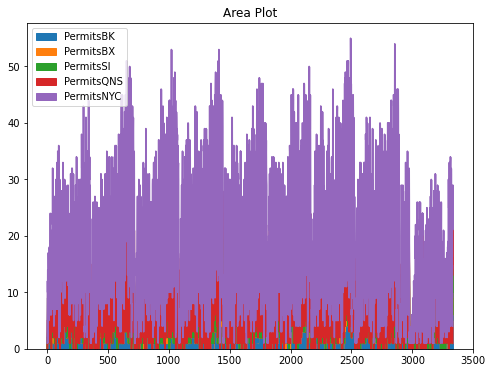

In [79]:
df_boro_ready.plot.area(figsize=(8, 6), title='Area Plot')

**Pandas Area Plot**
courtesy of Rashida Nasrin Sucky in [Towards Data Science](https://towardsdatascience.com/an-ultimate-cheat-sheet-for-data-visualization-in-pandas-f7bc239c9937)



---

